# Direct and Indirect Sampling

기본적인 Direct and Indirect Sampling에 대해 소개하고 각각의 한계점들에 대해 설명하겠습니다

# 1. Direct Sampling

# 1) Inverse Transformation Method

- Sampling의 기초가 되는 방법
- Uniform 분포에서 sampling해서 inverse function을 통해 원하는 분포에서 샘플링하는 방법

<b>Probability Integral Transformation theorem</b><br>
$U\sim Uniform(0,1)$이고 $X$가 random variable일 때<br>
$X=F^{-1}(U)$이면 $X\sim F$이고 이것은 모든 contiunous cdf에 대해 성립<br>
=> 즉 어떤 분포이던지 Uniform 분포로 변환될 수 있다

<b>Inversion Transfrom Method</b><br>

Probability Integral Transformation theorem을 거꾸로 적용해서 Uniform 분포를 transformation해서  $x$를 sampling 하는 방법<br>
<br>
Step<br>
1. inverse function $F_{x}^{-1}(u)$을 유도
2. $u^{*} \sim Uniform(0,1)$을 샘플링
3. inverse function $F_{x}^{-1}(u^{*})$을 통해 $x^{*}$ sampling

<b>예제 1</b><br>
$f(x)=3x^{2},0<x<1$일 때 x를 샘플링하라

문제에서의 cdf는 beta분포로 R 함수의 rbeta를 이용해서 샘플링이 가능하지만 beta함수인지 모를 경우 Inversion Method를 이용해서 쉽게 sampling 할 수 있음

$F_{x}(x)=x^{3}=u,0<x<1$<br>
$F_{x}^{-1}(u)=u^{1/3}, 0<u<1$

<b>예제 2</b><br>
$f(x)=\theta e^{-\theta x},0<x<\infty$일 때 x를 샘플링하라

$F_{x}(x)=1- e^{\theta x}=u,0<x<\infty$<br>
$F_{x}^{-1}(u)=-\frac{1}{\theta} ln(1-u), 0<u<1$

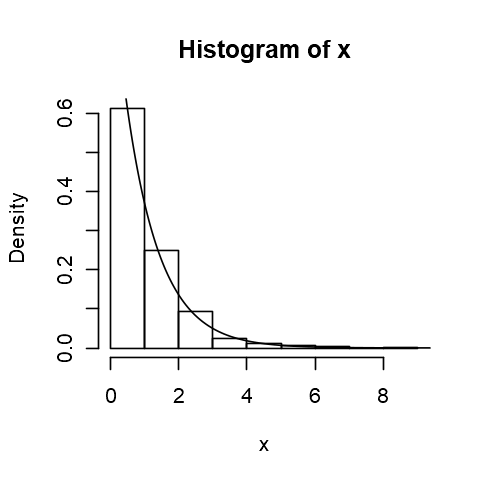

In [70]:
options(repr.plot.width=4, repr.plot.height=4)

theta=1
x=-1/theta*log(1-runif(n))

##sampling distribution
hist(x,prob=TRUE)

##true distribution
y=seq(0,10,0.01)
lines(y,theta*exp(-theta*y))

<b>$X$가 discrete할 때</b>

$F_{x}^{-1}(u)=x_{i}, F_{x}(x_{i-1})<u\leq F_{x}(x_{i}))$<br>

1) $u^{*}\sim Uniform(0,1)$<br>
2)  $F_{x}^{-1}(u^{*})=x^{*}_{i}$,  $F_{x}(x_{i-1})<u\leq F_{x}(x_{i}))$

<b>예제 1</b><br>
$X\sim Bernoulli(p=0.4)$에서 x를 샘플링하라

$f_{x}(x)=p^{x}(1-p)^{1-x}, x=0,1$<br>
$F_{x}(x)=(1-p)^{1-x}=u ,x=0,1$<br>
=> $x^{*}_{i}, F_{x}(x_{i-1})=0.6<u\leq F_{x}(x_{i})=1$

In [13]:
### Example: discrete case 1
n=1000
p=0.4
u=runif(n)
x=as.integer(u>0.6) #if u>0.6 => 1 o/w 0
mean(x)

[1] 0.392

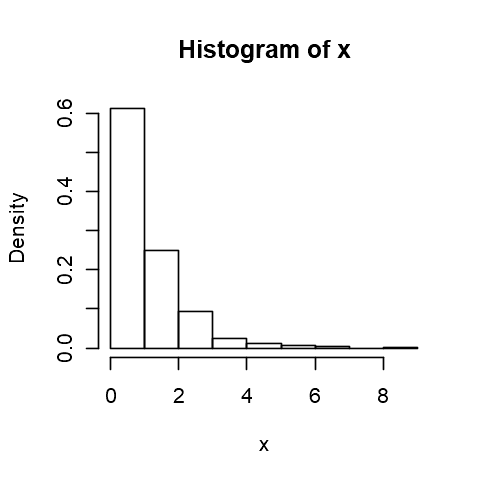

In [71]:
options(repr.plot.width=4, repr.plot.height=4)
hist(x,prob=TRUE)

<b>예제 2</b><br>
$X\sim Geometric(p=0.4)$에서 x를 샘플링하라

$f_{x}(x)=(1-p)^{x-1}p,x=1,2,...,$<br>
$F_{x}(x)=1-(1-p)^{x}=u$<br>
$F_{x}(u)=\frac{ln(1-u)}{ln(1-p)}  $

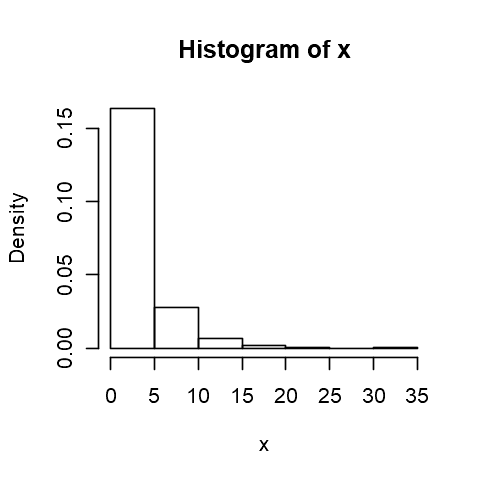

In [72]:
options(repr.plot.width=4, repr.plot.height=4)
n=1000
p=0.25
u=runif(n)
x=ceiling(log(1-u)/log(1-p))-1

hist(x,prob=TRUE)


<b>다른 분포 샘플링</b><br>
<br>
Exponential 분포와 다른 분포 간의 관계를 이용하여 다른 분포 역시 샘플링할 수 있음<br>
$U \sim Unif(0,1)$,$X=\theta ln(u) \sim exp(\theta)$를 따른 것을 이용하여<br>
$-2\sum_{j=1}^{v}ln(U_{j}) \sim \chi_{2v}^{2}$<br>
$-\beta \sum_{j=1}^{a}ln(U_{j}) \sim Gamma(\alpha,\beta)$ 등 <br>


<b> Inverse Transformation Method의 문제점 </b><br>
- Cdf의 closed form이 없으면 구할 수 없음
- 가장 대표적인 normal 분포의 cdf 역시 closed form이 없음
- Exponontial의 transform을 이용할 수 있지만 $N(0,1)$을 구할 수가 없음

# 2) Box-Muller Transform 

Uniform 분포에서 Standard Normal 분포를 샘플링하는 방법

$U_{1} \sim Unif(0,1)$,$U_{2} \sim Unif(0,1)$ 이고 $U_{1}$과 $U_{2}$가 independent하면 <br>
<br>
Step<br>
1) $R=\sqrt{-2ln(U_{1})}$, $\theta=2\pi U_{2}$로 설정<br>
2) $X=Rcos\theta \sim N(0,1)$, $Y=Rsin\theta \sim N(0,1)$이고 $X$와 $Y$는 독립  <br>

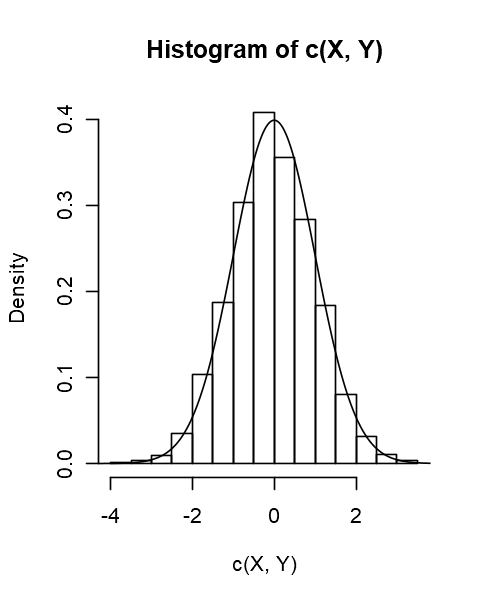

In [74]:
options(repr.plot.width=4, repr.plot.height=5)
n=1000

u1=runif(n)
u2=runif(n)

R=sqrt( -2*log(u1) )
theta=2*pi*u2

X=R*cos(theta)
Y=R*sin(theta)

##sampling
hist(c(X,Y),prob=TRUE)

#True
y=seq(-100,100,0.01)
lines(y,dnorm(y))

<b>Box-Muller Transform</b>
- 하나의 분포를 샘플링하는데 두 번이나 transformation해야 되는 번거로움
- 다른 분포에 적용할 수없어 일반화할 수가 없음

# 2. Indirect Sampling

- Direct method에서는 원하는 분포에서 샘플링하기 위해서는 직접적인 transformation이 가능해야 한다는 한계가 있었음
- Indirect method는 이런 transformation이 필요 없음

<b>1. Indirect Smapling Intuition</b><br>
<br>
$Y\sim f$는 타겟 분포로 샘플링하고 싶은 분포이고 $(U,V)\sim$ iid $Unif(0,1)$라고 가정<br>

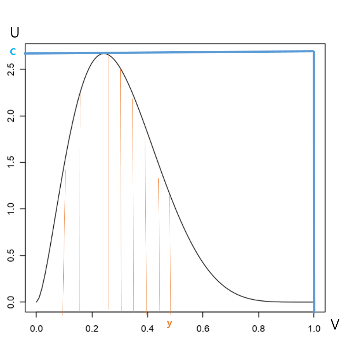

In [14]:
setwd('C:/Users/bki19/Desktop/Statistical Computing')
library(png)
options(repr.plot.width=3, repr.plot.height=3)
img <- readPNG("./indirect_sampling.png")
grid::grid.raster(img)

위 그림에서 파란색 안의 네모의 cdf는 $p_{U,V}(V<v,cU<u)$임<br>
타겟 분포의 cdf를 파란색 네모 안에서 구하면 $p_{U,V}(V<y,cU<f_{Y}(V))$로 표현할 수 있음<br>

<b>증명</b><br>
$p_{U,V}(V<y,cU<f_{Y}(V))=p_{U,V}(V<y,U<\frac{1}{c}f_{Y}(V))$<br>
$=\int_{0}^{y}\int_{0}^{f_{Y}(v)/c}dudv$<br>
$=\frac{1}{c}\int_{0}^{y}f_{Y}(y)dv$<br>
$=\frac{1}{c}P_{Y}(Y<y)$<br>
=>$P_{Y}(Y<y)=cP_{U,V}(V<y,U<\frac{1}{c}f_{Y}(V))$<br>
이제 Uniform 분포와 타겟 분포의 관계를 알기 때문에 Uniform분포에서 타겟 분포를 샘플링할 수 있음

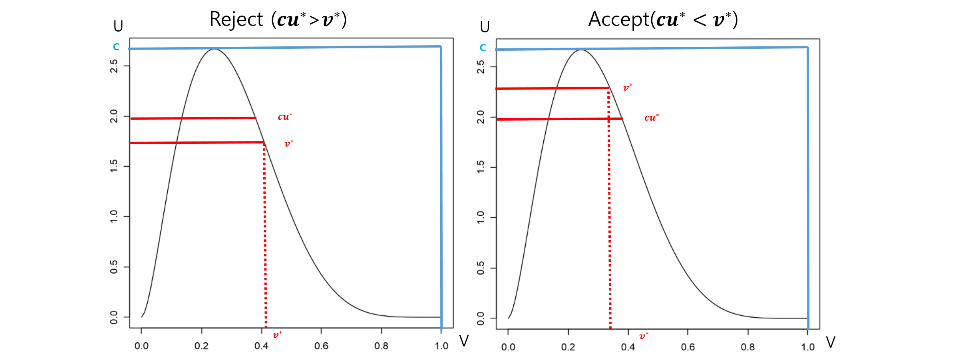

In [31]:
library(png)
options(repr.plot.width=8, repr.plot.height=3)
img1 <- readPNG("./accept_reject.png")
grid::grid.raster(img1)

<b>Sampling 절차</b><br>
<br>
1) 분포보다 높은 upperbound $c$를 설정, $c\geq \max_{y} f_{Y}(y)$<br>
2) $(u^{*},v^{*})\sim Unif(0,1)$으로 $u$, $v$ 각각 샘플링<br>
3) 만약 $u^{*}\leq \frac{1}{c}f_{Y}(v^{*})$이면 $y^{*}=v^{*}$으로 $v^{*}$을 $Y에서$ 샘플링 된 것으로 받아들임

c는 항상  $\max_{y} f_{Y}(y)$ 보다 높게 설정되야 하고 $Y$의 범위는 $(0,1)$이어야 됨<br>

<b>Sampling의 효율성</b><br>
<br>
만약 $y=1$이면 $\frac{1}{c}=p(U<\frac{1}{c} f_{Y}(V))$<br>
$P_{Y}(Y<y)=cP_{U,V}(V<y,U<\frac{1}{c}f_{Y}(V))$<br>
$=\frac{ P_{U,V}(V<y,U<\frac{1}{c}f_{Y}(V)) }{  p(U<\frac{1}{c} f_{Y}(V)) }$<br>
$=p(V < y)|U<\frac{1}{c} f_{Y}(V))$<br>
<br>
$Y$를 하나 샘플링하는데 $(U,V)$를 샘플링해야하는 횟수를 $N$이라고 하면<br>
$\frac{1}{c}=p(U<\frac{1}{c} f_{Y}(V))$<br>이기 때문에<br>
$N\sim Geometric(1/c)$를 따라 $E(N)=c$<br>
=> Y를 한번 sampling 하는데 $(U,V)$를 $c$쌍 sampling 해야 됨<br>
=> c는 작을 수록 좋기 때문에 $c=\max_{y} f_{Y}(y)$ 설정 됐을 때 optimal<br>

<b>예제</b><br>
$Y \sim Beta(2.7,6.3)$을 샘플링

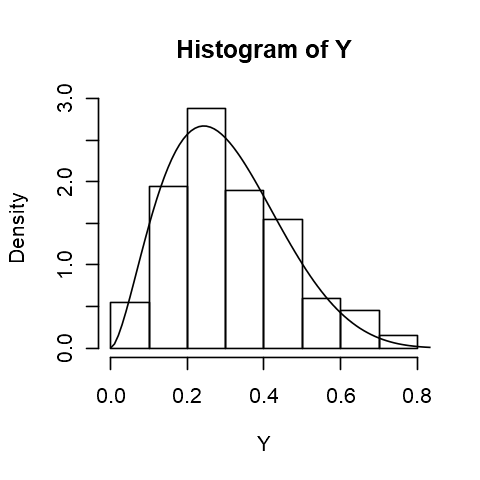

In [2]:
options(repr.plot.width=4, repr.plot.height=4)
n=1000
c=5 #upper bound
Y=c()

for (i in 1:n){
    u=runif(1)
    v=runif(1)
    if (u<=(1/c )*dbeta(v,2.7,6.3 ) ){
        Y=c(Y,v)    
    }
   
}
hist(Y,prob=TRUE)
y=seq(0,1,0.01)
lines(y,dbeta(y,2.7,6.3 ))

<b>2. Acceptance Rejection Sampling</b><br>

- 위의 방법을 사용했을 때의 문제는 $U>\frac{1}{c} f_{Y}(V)$인 부분이 필요없기 때문에 비효율적<br>
- $V$를 Uniform이 아니라 target 분포에 더 가까운 분포로 바꿀 수 있다면 더 효율적이게 됨<br>
- $M=\sup_{y}\frac{f_{Y}(y)}{g_{X}(y)}<\infty$라고 했을 때<br>
- 이제 $U$와 $\frac{f_{Y}(y)}{g_{X}(y)}$를 비교하면 이 비율이 작을 수록 $f$는 $g$와 가까워짐

<b>Sampling 절차</b><br>
<br>
이제 $V$를 $X$로 바꿔서 <br>
$Y\sim f$로 타겟 분포, $X\sim g$는 제안 분포, $U \sim Unif(0,1)$일 때,<br>
$\frac{1}{c}f_{Y}(v^{*})$를 $\frac{1}{M}f_{Y}(x)/g_{X}(x)$<br>
<br> 
1) $u^{*}\sim U$를 샘플링<br> 
2) $x^{*}\sim g$를 샘플링<br> 
3) Accept $u^{*}< \frac{1}{M}\frac{f_{Y}(x^{*})}{g_{X}(x^{*})}$이면 $y^{*}=x^{*}$으로 $x^{*}$을  $Y$에서 샘플링 된 것으로 받아들임

<b>증명</b><br>
<br>
$=p_{Y}(Y<y)=p_{X|U}(X<y|U<\frac{1}{M}\frac{f_{Y}(y)}{g_{X}(y)})$<br>
$=\frac{p_{X}(X<y,U<\frac{1}{M}\frac{f_{Y}(y)}{g_{X}(y)}) }{p_{U}(U<\frac{1}{M}\frac{f_{Y}(y)}{g_{X}(y)})}$<br>
$=\frac{\int_{-\infty}^{y}\int_{0}^{\frac{1}{M}\frac{f_{Y}(y)}{g_{X}(y)}}du f_{X}(x)dx}{\int_{-\infty}^{\infty}\int_{0}^{\frac{1}{M}\frac{f_{Y}(y)}{g_{X}(y)}}du f_{X}(x)dx}$<br>
$=\int_{-\infty}^{y}f_{X}(x)dx$

<b>Sampling 효율성</b><br>
만약 $y$가 support의 최대 값이면 $\frac{1}{M}=p(U<\frac{f_{Y}(y)}{g_{X}(y)})$<br>

$Y$를 하나 샘플링하는데 $(U,V)$를 샘플링해야하는 횟수를 $N$이라고 하면<br>
$\frac{1}{c}=p(U<\frac{1}{c} f_{Y}(V))$<br>이기 때문에<br>
$N\sim Geometric(1/M)$를 따라 $E(N)=M$<br>
=> $Y$를 한번 sampling 하는데 $(U,X)$를 $M$쌍 sampling 해야 됨<br>
=> 최적의 경우 Rejection sampling이 훨씬 효율적

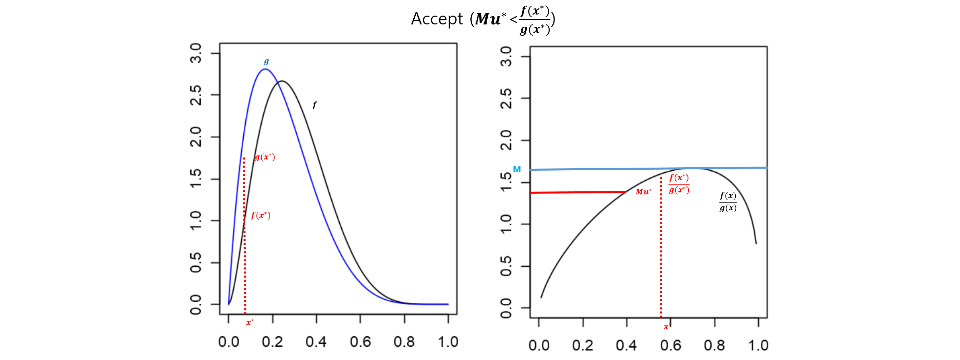

In [32]:
library(png)
options(repr.plot.width=8, repr.plot.height=3)
img3 <- readPNG("./rejection.png")
grid::grid.raster(img3)

<b>예제</b><br>
$X\sim Beta(2,6)$일 때 $Y \sim Beta(2.7,6.3)$를 샘플링

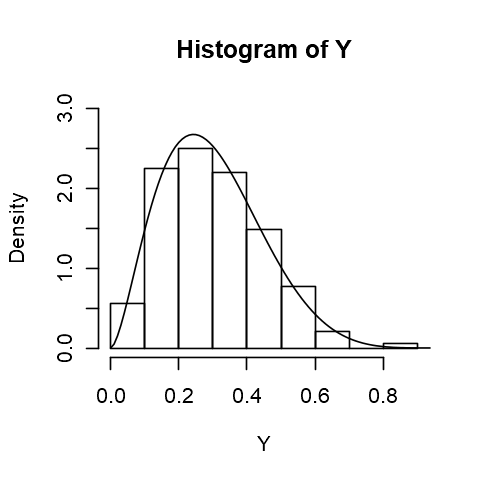

In [44]:
options(repr.plot.width=4, repr.plot.height=4)
M=5
n=1000
Y=c()

for (i in 1:n){
    u=runif(1)
    x=rbeta(1,2,6)
    if (u<(1/M )*  (dbeta(x,2.7,6.3 ) / dbeta(x,2,6 )  )   ){
        Y=c(Y,x)    
    }
   
}
hist(Y,prob=TRUE,ylim=c(0,3))
y=seq(0,1,0.01)
lines(y,dbeta(y,2.7,6.3 ))

<b>Acceptance Rejecton Algorithm의 문제점</b><br>
<br>
- $M=\sup_{y}\frac{f_{Y}(y)}{g_{X}(y)}<\infty$이기 때문에 꼬리 분포쪽에서 proposal 분포가 target 분포보다 작으면 분모가 0에 가까워져 $ㅡ$이 기하급수적으로 커짐<br>
- $M$ 값이 너무 커지면 $u^{*}< \frac{1}{M}\frac{f_{Y}(x^{*})}{g_{X}(x^{*})}$에서 오른쪽이 0에 가까워져 accept를 거의 못하게 됨<br>
- 때문에 Metropolis algorithm이나 gibbs sampler가 사용됨<br>
=> target 분포의 꼬리가 두꺼울 수록 작용을 안함


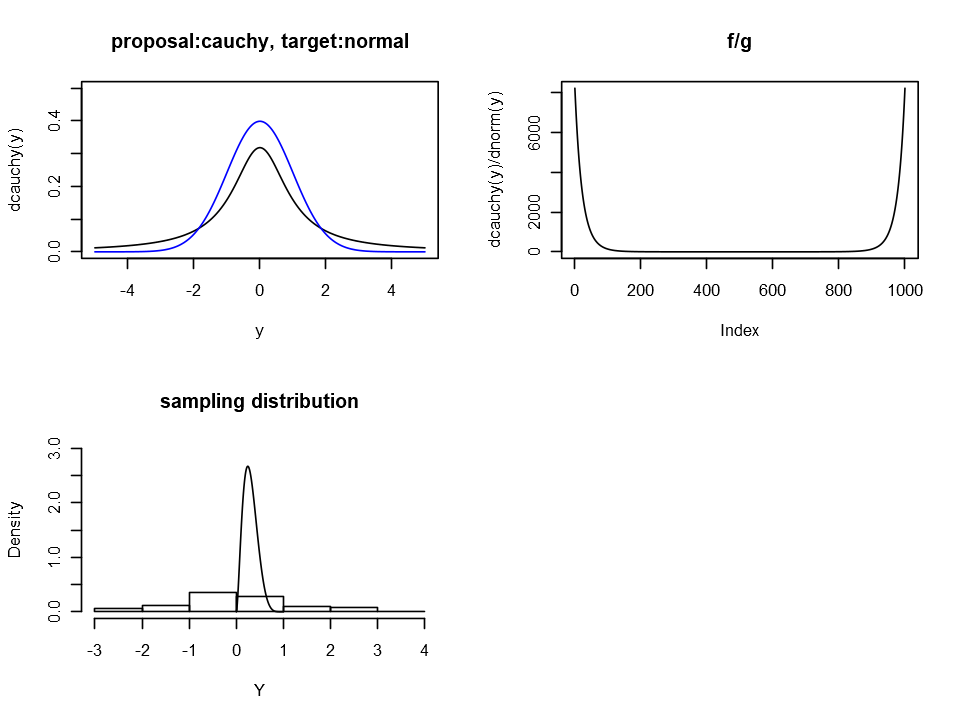

In [67]:
options(repr.plot.width=8, repr.plot.height=6)
par(mfrow=c(2,2))
y=seq(-5,5,0.01)
plot(y,dcauchy(y),type='l',ylim=c(0,0.5),main='proposal:cauchy, target:normal')
lines(y,dnorm(y),type='l',col='blue')
plot(dcauchy(y)/dnorm(y),type='l',main='f/g')
M=10
n=1000
Y=c()

for (i in 1:n){
    u=runif(1)
    x=rnorm(1)
    if (u<(1/M )*  (dcauchy(x ) / dnorm(x )  )   ){
        Y=c(Y,x)    
    }
   
}
hist(Y,prob=TRUE,ylim=c(0,3),main='sampling distribution')
y=seq(0,1,0.01)
lines(y,dbeta(y,2.7,6.3 ))

위와 같이 Normal 분포보다 꼬리가 두꺼운 cauchy 분포를 샘플링할 때 샘플링이 잘 안됨

출처<br>
- Rizzo, M. L. (2007). Statistical computing with R. Chapman and Hall/CRC.
- Casella, G., & Berger, R. L. (2002). Statistical inference (Vol. 2). Pacific Grove, CA: Duxbury.